# Método de la matriz inversa para la regresión lineal

- $ Ax = b $
- $ A^TAx = A^Tb $
- $ x = (A^TA)^{-1}A^Tb $

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
session = tf.Session()

In [3]:
x_vals = np.linspace(0,10,100)
y_vals = x_vals + np.random.normal(0,1,100)

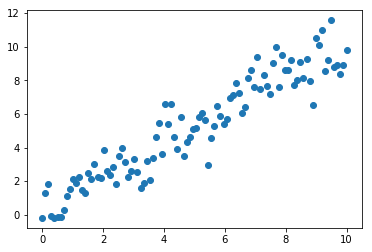

In [29]:
plt.plot(x_vals, y_vals, "o")

In [9]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1,100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

In [10]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [13]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
result = tf.matmul(product, b_tensor)
result_eval = session.run(result)

In [14]:
result_eval

array([[0.98837742],
       [0.3327018 ]])

In [16]:
slope = result_eval[0][0]
intercept = result_eval[1][0]

In [20]:
print(str(np.round(slope,3)) + "x + " + str(np.round(intercept,3)))

0.988x + 0.333


In [21]:
best_fit = []
for x in x_vals:
    best_fit.append(slope*x + intercept)

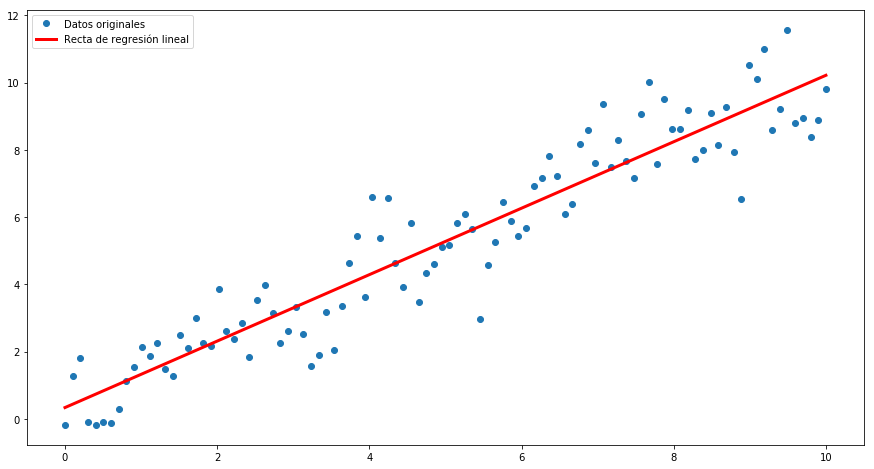

In [28]:
plt.figure(figsize=(15,8))
plt.plot(x_vals, y_vals, "o", label="Datos originales")
plt.plot(x_vals, best_fit, "r-", label="Recta de regresión lineal", linewidth=3)
plt.legend(loc="upper left")
plt.show()

# Método de la descomposición de Cholesky (más estable)

$ A = LU $
- $L$: matriz triangular superior
- $U$: matriz triangular inferior
- $L^T = U$

$ A^TAx = A^Tb $

$ LUx = A^Tb $

$ Ux = y $

$ Ly = A^Tb $

In [30]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [31]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [35]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)
tA_b = tf.matmul(tf.transpose(A_tensor), b_tensor)
y = tf.matrix_solve(L, tA_b) # Resuelve la ecuación Ly = A^T*b
x = tf.matrix_solve(tf.transpose(L), y)

In [37]:
x_evaluation = session.run(x)

In [38]:
x_evaluation

array([[0.98837742],
       [0.3327018 ]])

In [40]:
slope = x_evaluation[0][0]
intercept = x_evaluation[1][0]

print(str(np.round(slope, 3)) + "x + " + str(np.round(intercept, 3)))

0.988x + 0.333


In [41]:
best_fit = []

for x in x_vals:
    best_fit.append(slope*x + intercept)

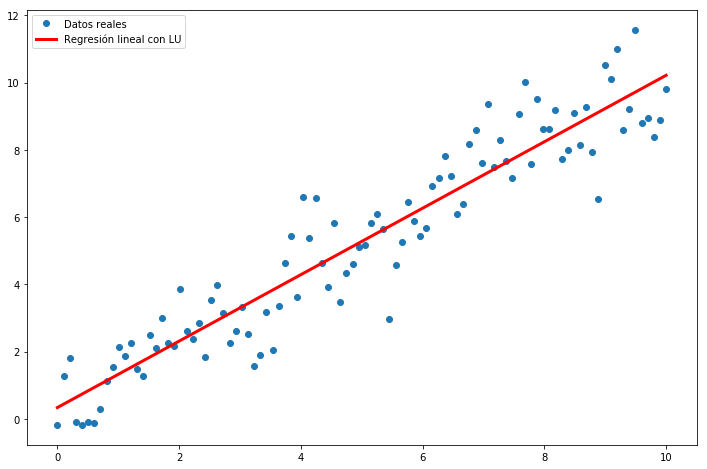

In [43]:
plt.figure(figsize=(12,8))
plt.plot(x_vals, y_vals, "o", label="Datos reales")
plt.plot(x_vals, best_fit, "r-", label="Regresión lineal con LU", linewidth=3)
plt.legend(loc="upper left")
plt.show()